In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts

In [2]:
path = '/home/luan/Área de Trabalho/ESTUDOS/UDEMY/Cientista de Dados - Python e R/9.Prаtica em R/dados/Churn.csv'

In [3]:
df = pd.read_csv(path,sep = ';')
df.columns = ["Id","Score","Estado","Sexo","Idade","Patrimonio","Saldo","Produtos","TemCartCredito","Ativo","Salário","Saiu"]

In [4]:
# Verificando as colunas com itens faltantes
faltante = df.isna().any()
faltante == True

Id                False
Score             False
Estado            False
Sexo               True
Idade             False
Patrimonio        False
Saldo             False
Produtos          False
TemCartCredito    False
Ativo             False
Salário            True
Saiu              False
dtype: bool

In [5]:
# Vericicando itens duplicados
df[df.duplicated(keep = 'first') == True]

,Id,Score,Estado,Sexo,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salário,Saiu
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [6]:
def int2str(n):
    if n == 1:
        return 'Sim'
    return 'Não'
df['TemCartCredito'] = df['TemCartCredito'].apply(int2str)
df['Ativo'] = df['Ativo'].apply(int2str)
df['Saiu'] = df['Saiu'].apply(int2str)

In [7]:
# Verificando o tipo de dado
df.describe()

,Id,Score,Idade,Patrimonio,Saldo,Produtos,Salário
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,9.920000e+02
mean,500.916917,648.621622,38.902903,5.069069,7.164928e+06,1.526527,3.528762e+07
std,288.662884,98.264219,11.401912,2.927691,6.311840e+06,0.574201,5.305800e+08
min,1.000000,376.000000,-20.000000,0.000000,0.000000e+00,1.000000,9.677000e+03
25%,251.500000,580.000000,32.000000,2.000000,0.000000e+00,1.000000,3.029011e+06
50%,501.000000,653.000000,37.000000,5.000000,8.958835e+06,1.000000,8.703250e+06
75%,750.500000,721.000000,44.000000,8.000000,1.258684e+07,2.000000,1.405213e+07
max,1000.000000,850.000000,140.000000,10.000000,2.117743e+07,4.000000,1.193469e+10


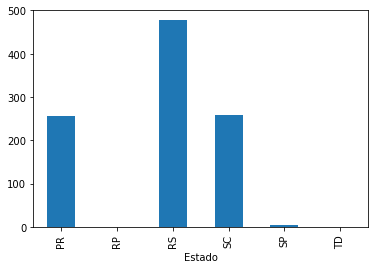

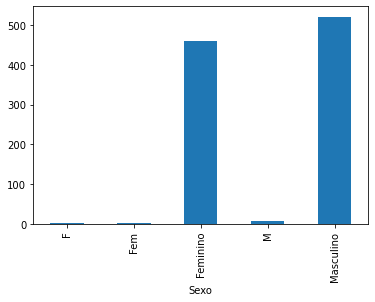

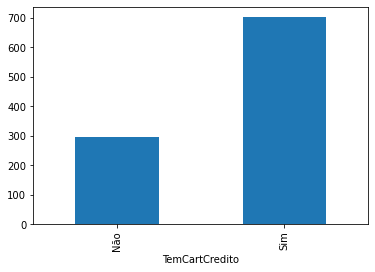

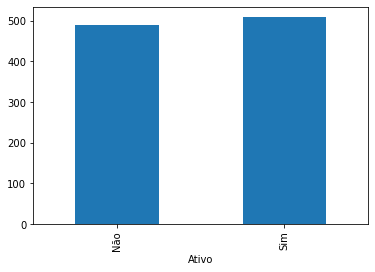

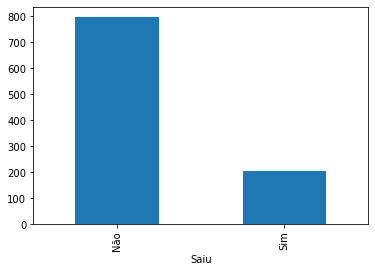

In [8]:
for i,cat in enumerate(('Estado','Sexo','TemCartCredito','Ativo','Saiu')):
    plt.figure(i)
    df.groupby([cat]).size().plot(kind = 'bar')

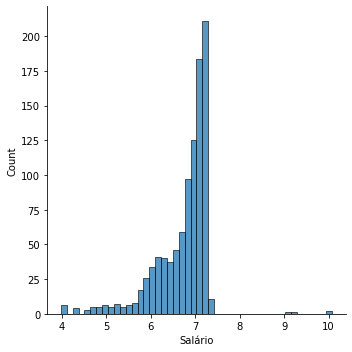

In [12]:
sns.displot(np.log10(df['Salário']))

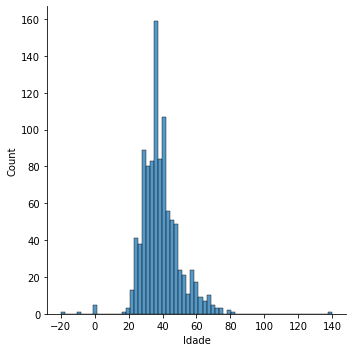

In [19]:
sns.displot(df['Idade'])

In [20]:
df.loc[df['Sexo'].isin(['Fem','F']),'Sexo'] = 'Feminino'
df.loc[df['Sexo'] == 'M','Sexo'] = 'Masculino'

In [23]:
df['Salário'].fillna(value = sts.median(df['Salário']),inplace = True)

In [24]:
df.loc[df['Estado'].isin(['RP','SP','TD']),'Estado'] = 'RS'

In [25]:
df.drop_duplicates(subset="Id", keep='first',inplace=True)
#df.drop(df[df.duplicated(keep = 'first') == True].index,inplace = True)
df.reset_index(drop=True,inplace = True)

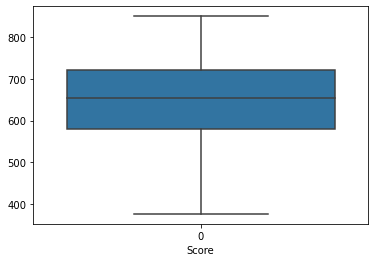

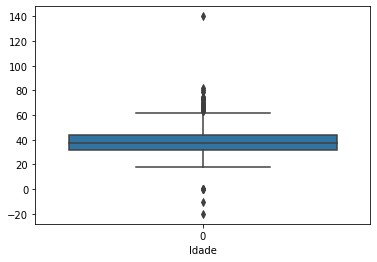

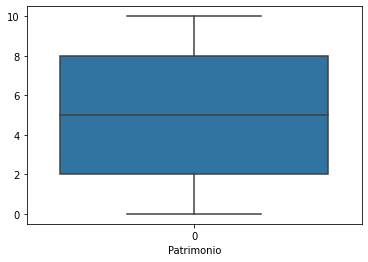

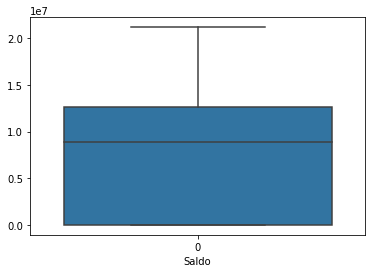

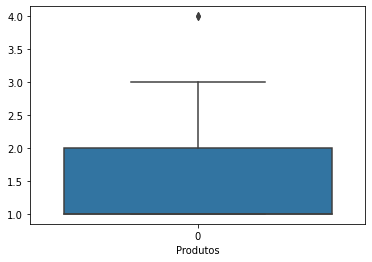

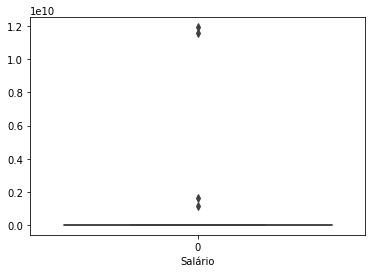

In [29]:
numeric = df.describe().columns
for i,num in enumerate(numeric[1:]):
    plt.figure(i)
    sns.boxplot(data = df[num])
    plt.xlabel(num)

In [30]:
#q75 = np.percentile(df['Salário'],75)
#q25 = np.percentile(df['Salário'],25)
#DIQ = q75-q25
s = np.std(df['Salário'])
#df.loc[df['Salário']>q75+1.5*DIQ,'Salário'] = q75+1.5*DIQ
df.loc[df['Salário']>2*s,'Salário'] = np.percentile(df['Salário'],50)

<AxesSubplot:>

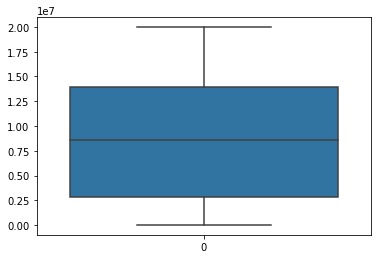

In [31]:
sns.boxplot(data = df['Salário'])

In [32]:
q50 = np.percentile(df['Idade'],50)

df.loc[df['Idade']>120,'Idade'] = q50
df.loc[df['Idade']<0] = q50

<AxesSubplot:>

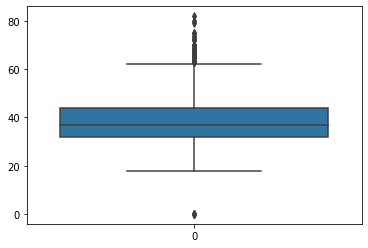

In [33]:
sns.boxplot(data = df['Idade'])

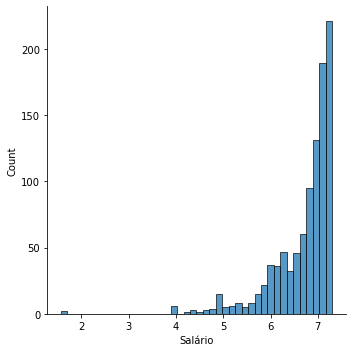

In [35]:
sns.displot(np.log10(df['Salário']))

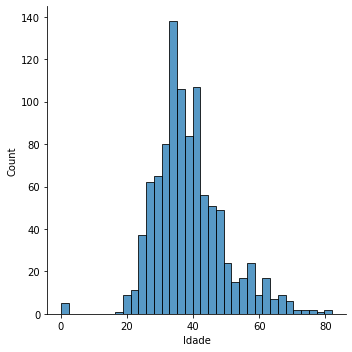

In [37]:
sns.displot(df['Idade'])